# __Package를 사용하여 AdaBoost 코드 작성__

In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [2]:
filename = '../dataset/pima-indians-diabetes.data.csv'
dataframe = pd.read_csv(filename, header = -1)
dataframe.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1] 

In [4]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [6]:
# 데이터 셋 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 

In [7]:
# 분류기 생성
abc = AdaBoostClassifier(n_estimators=100)

# 모델 피팅하기
abc.fit(X_train, y_train) # 학습용 데이터 사용, 새롭게 변수 지정을 하지 않아도 된다

# 피팅된 모델에 테스트 데이터로 검증
y_pred = abc.predict(X_test)

In [8]:
# 정확도 확인
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116883116883117


- 변수중요도

In [9]:
abc.feature_importances_

array([0.03, 0.18, 0.1 , 0.05, 0.08, 0.2 , 0.25, 0.11])

In [10]:
var_df = pd.Series(abc.feature_importances_, index = dataframe.columns[:-1])
var_df.sort_values(ascending=False)

DiabetesPedigreeFunction    0.25
BMI                         0.20
Glucose                     0.18
Age                         0.11
BloodPressure               0.10
Insulin                     0.08
SkinThickness               0.05
Pregnancies                 0.03
dtype: float64

---

# __Package를 사용하여 Gradient Boosting Machine 코드 작성__

In [11]:
# 패키지 불러오기
from sklearn.ensemble import GradientBoostingClassifier
# 성능지표
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# 데이터 파티션
from sklearn.model_selection import train_test_split
# 데이터 불러오기
import pandas as pd

In [12]:
filename = '../dataset/pima-indians-diabetes.data.csv'
dataframe = pd.read_csv(filename, header = -1)
dataframe.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1] 

In [13]:
# 데이터 셋 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0) 

In [24]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, random_state = 1)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}\n".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.862
Accuracy score (validation): 0.812

Learning rate:  0.1
Accuracy score (training): 0.919
Accuracy score (validation): 0.805

Learning rate:  0.25
Accuracy score (training): 0.989
Accuracy score (validation): 0.799

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.786

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.786

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.740



In [31]:
# confusion matrix 그려보기

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.7792207792207793
Confusion Matrix:
[[88 19]
 [15 32]]


<p align="center"><img width="700" height="auto" src="../images/confusion_m.png"></p>

- precision : 정밀율, Positive 클래스에 속한다고 **예측된** 샘플 중 실제로 Positive 클래스에 속하는 샘플 수의 비율 (TP / (TP + FP))
- recall    : 재현율, **실제** Positive 클래스에 속한 샘플 중에 Positive 클래스에 속한다고 출력한 표본의 수 (TP / (TP + FN))
- f1-score  : 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균 (2 * precision * recall / (precision + recall))
- support   : 실제 클래스 수
- micro avg: 모든 label에 대한 잘맞춘 경우(True Postive, True Negative)의 비율을 계산
    - $(88+32)/(88+32+15+19) = 0.779$
- macro avg: 각 label의 f1-score 평균
    - $ 1/2* 0.84 + 1/2* 0.65 = 0.745$
- weighted avg: 각 label의 f1-score를 label 개수로 가중평균
    - $107/(107 + 47)*0.84 + 47/(107 + 47)*0.65 = 0.782$

In [26]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.63      0.68      0.65        47

   micro avg       0.78      0.78      0.78       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.79      0.78      0.78       154



In [27]:
# Area-Under-ROC curve

y_scores = gb.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print("Area under ROC curve = {:0.2f}".format(roc_auc))

Area under ROC curve = 0.84


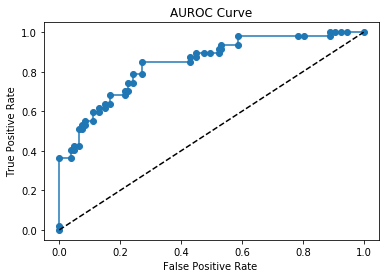

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.show()

- 변수중요도

In [29]:
gb.feature_importances_

array([0.03062386, 0.3829904 , 0.05588156, 0.0175501 , 0.04665778,
       0.20854418, 0.11013047, 0.14762164])

In [30]:
var_df = pd.Series(gb.feature_importances_, index = dataframe.columns[:-1])
var_df.sort_values(ascending=False)

Glucose                     0.382990
BMI                         0.208544
Age                         0.147622
DiabetesPedigreeFunction    0.110130
BloodPressure               0.055882
Insulin                     0.046658
Pregnancies                 0.030624
SkinThickness               0.017550
dtype: float64